# IBM Project: Real-Time Communication System Powered by AI for Specially Abled


# --------------------------------------------------------------------------------------------------

# IMPORTING NECESSARY LIBRARIES

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [2]:
train_data_path = '../train_dataset/'
test_data_path = '../test_dataset/'

In [3]:
def display(img,sign=None):
    
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111)
    plt.title(sign)
    ax.imshow(img)

In [4]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.2,
                              zoom_range=0.2,
                              rescale=1./255,
                              horizontal_flip=True,
                              fill_mode='nearest',
                              validation_split=0.25)

In [5]:
train_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(256,256),
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='categorical',
                                           subset='training',
                                               color_mode='grayscale')

Found 41625 images belonging to 37 classes.


In [6]:
validation_data_gen = image_gen.flow_from_directory(train_data_path,
                                           target_size=(256,256),
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='categorical',
                                           subset='validation',
                                                     color_mode='grayscale')

Found 13875 images belonging to 37 classes.


In [7]:
test_data_gen = image_gen.flow_from_directory(test_data_path,
                                           target_size=(256,256),
                                           batch_size=32,
                                           shuffle=True,
                                           class_mode='categorical',
                                            color_mode='grayscale'
                                           )

Found 2587 images belonging to 37 classes.


In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [9]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(256,256,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=37, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('sld_model.h5',monitor='val_loss',mode='min',save_best_only=True)

cbs = [checkpoint]

In [11]:
history = model.fit(train_data_gen, epochs=100, steps_per_epoch=100, validation_data=validation_data_gen, validation_steps=50, callbacks=cbs)

Epoch 1/100
100/100 [==============================] - 335s 3s/step - loss: 3.1987 - accuracy: 0.0697 - val_loss: 2.7720 - val_accuracy: 0.1181
Epoch 2/100
100/100 [==============================] - 316s 3s/step - loss: 2.4819 - accuracy: 0.2019 - val_loss: 2.0257 - val_accuracy: 0.3262
Epoch 3/100
100/100 [==============================] - 314s 3s/step - loss: 1.8010 - accuracy: 0.4087 - val_loss: 1.6578 - val_accuracy: 0.4219
Epoch 4/100
100/100 [==============================] - 314s 3s/step - loss: 1.3102 - accuracy: 0.5581 - val_loss: 1.2392 - val_accuracy: 0.6000
Epoch 5/100
100/100 [==============================] - 314s 3s/step - loss: 1.0341 - accuracy: 0.6463 - val_loss: 0.8750 - val_accuracy: 0.7156
Epoch 6/100
100/100 [==============================] - 313s 3s/step - loss: 0.7323 - accuracy: 0.7616 - val_loss: 0.7827 - val_accuracy: 0.7356
Epoch 7/100
100/100 [==============================] - 313s 3s/step - loss: 0.6565 - accuracy: 0.7831 - val_loss: 0.6428 - val_accuracy:

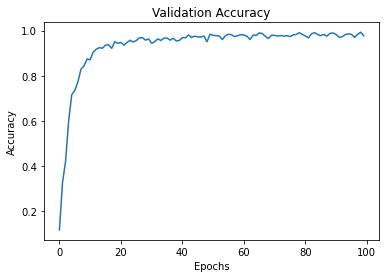

In [29]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.epoch,history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.show()

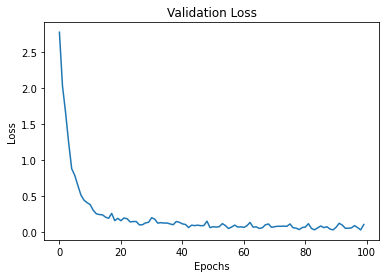

In [30]:
plt.figure()
plt.plot(history.epoch,history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Validation Loss')
plt.show()

In [13]:
from keras.models import load_model

In [43]:
model = load_model('sld_model.h5')

In [31]:
quality = model.evaluate(validation_data_gen)

434/434 [==============================] - 401s 923ms/step - loss: 0.0229 - accuracy: 0.9919


In [33]:
print('The accuracy of the model is {:.2f}%'.format(quality[1]*100))

The accuracy of the model is 99.19%


In [34]:
label2id = test_data_gen.class_indices

In [37]:
keys = list(label2id.keys())


In [18]:
from skimage.transform import resize
import cv2
import numpy as np

In [40]:
def detect(frame):
    img = resize(frame,(256,256,1))
    img = np.expand_dims(img,axis=0)
    if(np.max(img)>1):
        img = img/255.0
    prediction = np.argmax(model.predict(img))
    for i in keys:
        if label2id[i] == prediction:
            print(i+'\n')

Space



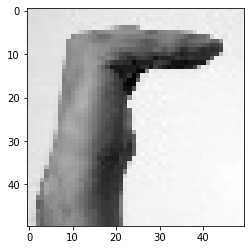

In [41]:
# frame = cv2.imread('../1.jpg')
frame = cv2.imread('../test_dataset/Space/Space_19.jpeg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
plt.imshow(frame, cmap='gray')
data = detect(frame)